In [1]:
import pandas as pd
import numpy as np
from stock_data import StockData

In [10]:
def equal_index_construction(data: pd.DataFrame):
    def log_ret(s:pd.Series):
        return np.log(s / s.shift(1))
    
    data['log_ret'] = data.groupby('ticker', group_keys=False)['adjusted_close'].apply(log_ret)

    df = data.dropna().copy()
    df['w'] = df.groupby('date', group_keys=False)['adjusted_close'].transform(lambda x : 1 / len(x))

    index = pd.DataFrame()
    index['open'] = df.groupby('date').apply(lambda x: x['open']@x['w'])
    index['high'] = df.groupby('date').apply(lambda x: x['high']@x['w'])
    index['low'] = df.groupby('date').apply(lambda x: x['low']@x['w'])
    index['close'] = df.groupby('date').apply(lambda x: x['close']@x['w'])
    index['adjusted_close'] = df.groupby('date').apply(lambda x: x['adjusted_close']@x['w'])
    index['volume'] = df.groupby('date').apply(lambda x: x['volume']@x['w'])
    index['log_ret'] = df.groupby('date').apply(lambda x: x['log_ret']@x['w'])

    return index

In [2]:
stock_info = pd.read_csv("sp_400_midcap.csv")

In [7]:
sector_ls = stock_info["GICS Sector"].unique().tolist()

In [8]:
stock = StockData('sp_400_midcap.csv', '662166cb8e3d13.57537943')
df = stock.fetch_stocks_by_sectors(sector=sector_ls[0], period = 'd', start = '2000-01-01', end = '2024-8-30')

In [17]:
equal_index_construction(df)['log_ret'].rename(sector_ls[0])

date
2000-01-04   -0.011152
2000-01-05    0.014503
2000-01-06    0.019151
2000-01-07    0.001463
2000-01-10    0.002355
                ...   
2024-08-26    0.002536
2024-08-27   -0.007176
2024-08-28   -0.010168
2024-08-29    0.009288
2024-08-30    0.005963
Name: Materials, Length: 6204, dtype: float64

In [18]:
sector_ls = stock_info["GICS Sector"].unique().tolist()

In [19]:
sector_tmp = []
for sector in sector_ls:
    df = stock.fetch_stocks_by_sectors(sector=sector, period = 'd', start = '2000-01-01', end = '2024-8-30')
    sector_idx = equal_index_construction(df)['log_ret'].rename(sector)
    sector_tmp.append(sector_idx)

data = pd.concat(sector_tmp, axis=1)

In [22]:
data.columns

Index(['Materials', 'Industrials', 'Health Care', 'Real Estate',
       'Consumer Discretionary', 'Financials', 'Utilities',
       'Information Technology', 'Energy', 'Consumer Staples',
       'Communication Services'],
      dtype='object')

<Axes: xlabel='date'>

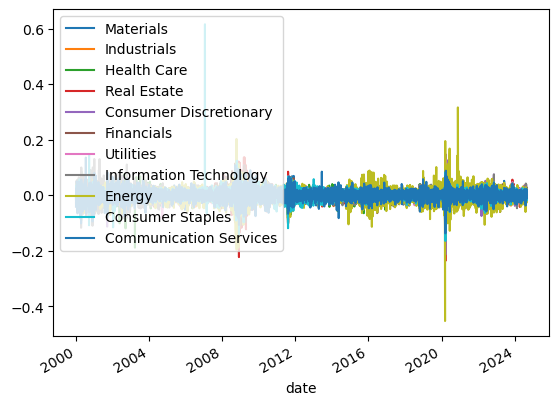

In [41]:
data.plot()

In [25]:
df_cons = stock.fetch_stocks_by_sectors(sector='Consumer Staples', period = 'd', start = '2000-01-01', end = '2024-8-30')

In [33]:
indx = equal_index_construction(df_cons)
indx

,open,high,low,close,adjusted_close,volume,log_ret
date,,,,,,,
2000-01-04,17.982112,18.236025,17.580100,17.912138,10.567888,2.033791e+05,-0.014955
2000-01-05,17.986350,18.445075,17.759788,18.226413,10.773275,1.810860e+05,0.015156
2000-01-06,18.107437,18.396500,17.867475,18.041150,10.672688,3.069576e+05,-0.012218
2000-01-07,20.451000,20.738986,20.254943,20.518329,12.036143,4.743226e+05,0.010284
2000-01-10,18.271612,18.466925,17.990987,18.197500,10.819263,2.037779e+05,-0.001941
...,...,...,...,...,...,...,...
2024-08-26,183.779412,185.290588,181.033888,182.560000,182.449800,1.275696e+06,-0.003794
2024-08-27,181.951765,182.869700,180.532524,181.571765,181.462771,1.145565e+06,-0.004134
2024-08-28,181.765294,182.576341,178.866929,180.765882,180.655988,1.177786e+06,-0.002225


In [37]:
indx["2007-01-17":"2007-01-30"]

,open,high,low,close,adjusted_close,volume,log_ret
date,,,,,,,
2007-01-17,33.301250,33.742513,33.113737,33.383775,24.170988,358852.125000,0.001779
2007-01-18,33.307513,33.540000,32.683763,32.863750,23.781075,294589.125000,-0.009798
2007-01-19,32.876263,33.601250,32.745013,33.425012,24.218575,329689.500000,0.013199
2007-01-22,29.818900,30.093356,29.375567,29.657789,22.799133,273635.222222,0.615254
2007-01-23,29.542244,30.096678,29.307800,29.806689,22.649089,465725.444444,-0.015579
2007-01-24,29.857767,30.267789,29.746656,30.044444,22.939744,504918.666667,0.018968
2007-01-25,30.062244,30.201111,29.326689,29.532244,22.690778,283407.666667,-0.002295
2007-01-26,29.528889,29.855578,29.265556,29.612244,22.681422,306152.555556,-0.003895
2007-01-29,29.457767,30.240000,29.327778,29.833344,23.128156,569437.444444,0.033926


In [44]:
df_cons.loc["2007-01-19"]

,open,high,low,close,adjusted_close,volume,log_ret
ticker,,,,,,,
CASY,24.6600,25.26,24.5200,25.0900,21.2182,285933,0.019315
COKE,63.4500,66.32,63.4500,66.0200,53.8715,25340,0.041914
DAR,5.3400,5.55,5.3000,5.4700,5.4700,760000,0.014733
FLO,26.6601,26.91,26.5401,26.6801,4.5822,686475,0.002994
INGR,35.0000,35.00,34.6300,34.7500,23.7089,243100,-0.003448
LANC,43.9200,45.13,43.8400,45.0300,27.8571,72668,0.022456
PPC,29.3100,29.70,29.0800,29.4700,22.1630,545800,0.001016
SAM,34.6700,34.94,34.6000,34.8900,34.8777,18200,0.006613


In [43]:
df_cons.loc["2007-01-22"]

,open,high,low,close,adjusted_close,volume,log_ret
ticker,,,,,,,
CASY,25.0600,25.1400,24.5000,24.8500,21.0153,230697,-0.009609
CELH,1.2000,2.0001,1.2000,2.0001,13.3333,15075,5.583999
COKE,66.1900,66.4600,65.2800,65.5200,53.4635,15500,-0.007602
DAR,5.2500,5.6300,5.2500,5.5900,5.5900,466700,0.021701
FLO,26.7501,26.8401,26.6301,26.7300,4.5908,471150,0.001875
INGR,34.7300,35.0600,34.0200,34.0400,23.2245,511500,-0.020643
LANC,44.9400,45.1000,44.0500,44.4800,27.5169,95695,-0.012288
PPC,29.4600,29.6700,29.1300,29.2000,21.9600,626900,-0.009202
SAM,34.7900,34.9400,34.3200,34.5100,34.4979,29500,-0.010949


In [45]:
df_cons.loc[(slice(None), "CELH"), :]

,,open,high,low,close,adjusted_close,volume,log_ret
date,ticker,,,,,,,
2006-11-01,CELH,0.0300,0.0300,0.0300,0.0300,0.0501,120000,NaN
2007-01-22,CELH,1.2000,2.0001,1.2000,2.0001,13.3333,15075,5.583999
2007-01-23,CELH,2.2500,2.2500,1.5000,1.5900,10.6000,9330,-0.229411
2007-01-24,CELH,1.5999,2.2500,1.5999,1.7901,11.9333,20415,0.118479
2007-01-25,CELH,1.8501,2.0100,1.8501,2.0001,13.3333,12300,0.110932
...,...,...,...,...,...,...,...,...
2024-08-26,CELH,39.7100,41.1700,39.7000,40.1300,40.1300,3293600,0.014811
2024-08-27,CELH,39.8500,40.5000,39.6600,39.8000,39.8000,2603500,-0.008257
2024-08-28,CELH,39.6300,39.7400,37.8500,38.0900,38.0900,3754100,-0.043915


In [48]:
tmp = stock.fetch_stock(ticker='CELH',period = 'd', start = '2000-01-01', end = '2024-10-18')

fetch data for CELH...


In [49]:
tmp

,date,open,high,low,close,adjusted_close,volume
0,2006-11-01,0.0300,0.0300,0.0300,0.0300,0.0501,120000
1,2007-01-22,1.2000,2.0001,1.2000,2.0001,13.3333,15075
2,2007-01-23,2.2500,2.2500,1.5000,1.5900,10.6000,9330
3,2007-01-24,1.5999,2.2500,1.5999,1.7901,11.9333,20415
4,2007-01-25,1.8501,2.0100,1.8501,2.0001,13.3333,12300
...,...,...,...,...,...,...,...
4463,2024-10-11,34.9100,35.4000,32.7200,32.8000,32.8000,18275000
4464,2024-10-14,33.1050,35.0400,31.6000,34.8200,34.8200,14494803
4465,2024-10-15,34.3100,35.5800,33.5500,34.1600,34.1600,14963850
4466,2024-10-16,34.7200,35.8300,33.3000,33.7800,33.7800,10954704
